# Canny Edge Detection
detects the edges

In [23]:
import numpy as np
import cv2
import glob
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [24]:
!wget -O test1.mp4 https://github.com/misbah4064/lane_detection/raw/master/test1.mp4

--2025-01-23 20:24:17--  https://github.com/misbah4064/lane_detection/raw/master/test1.mp4
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/misbah4064/lane_detection/master/test1.mp4 [following]
--2025-01-23 20:24:17--  https://raw.githubusercontent.com/misbah4064/lane_detection/master/test1.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7974720 (7.6M) [application/octet-stream]
Saving to: ‘test1.mp4’

test1.mp4           100%[===================>]   7.60M  --.-KB/s    in 0.06s   

2025-01-23 20:24:17 (135 MB/s) - ‘test1.mp4’ saved [7974720/7974720]



In [25]:
!wget -O chess.png https://github.com/misbah4064/lane_detection/raw/master/chess.png

--2025-01-23 20:24:18--  https://github.com/misbah4064/lane_detection/raw/master/chess.png
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/misbah4064/lane_detection/master/chess.png [following]
--2025-01-23 20:24:18--  https://raw.githubusercontent.com/misbah4064/lane_detection/master/chess.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19724 (19K) [image/png]
Saving to: ‘chess.png’

chess.png           100%[===================>]  19.26K  --.-KB/s    in 0.001s  

2025-01-23 20:24:18 (32.8 MB/s) - ‘chess.png’ saved [19724/19724]



In [26]:
!git clone https://github.com/Dt-Pham/Advanced-Lane-Lines.git

fatal: destination path 'Advanced-Lane-Lines' already exists and is not an empty directory.


In [27]:
!wget -O road.jpg https://raw.githubusercontent.com/Dt-Pham/Advanced-Lane-Lines/master/test_images/straight_lines2.jpg

--2025-01-23 20:24:18--  https://raw.githubusercontent.com/Dt-Pham/Advanced-Lane-Lines/master/test_images/straight_lines2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193098 (189K) [image/jpeg]
Saving to: ‘road.jpg’

road.jpg            100%[===================>] 188.57K  --.-KB/s    in 0.01s   

2025-01-23 20:24:18 (14.5 MB/s) - ‘road.jpg’ saved [193098/193098]



-------------
# Camera Calibration

In [28]:
objpoints = []
imgpoints = []
nx = 9
ny = 6
image_dir = '/content/Advanced-Lane-Lines/camera_cal'

images = glob.glob('{}/*'.format(image_dir))

objp = np.zeros((9*6,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

for image in images:
  img = cv2.imread(image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, corners = cv2.findChessboardCorners(gray ,(9,6))

  if ret:
    imgpoints.append(corners)
    objpoints.append(objp)

  shape = (img.shape[1],img.shape[0])
  ret, mtx, dist,_,_ = cv2.calibrateCamera(objpoints, imgpoints, shape, None, None)

def undistort_img(distorted_image):
  # distorted_image = cv2.cvtColor(distorted_image, cv2.COLOR_BGR2GRAY) # gray 2D problem
  return cv2.undistort(distorted_image, mtx, dist, None, mtx)

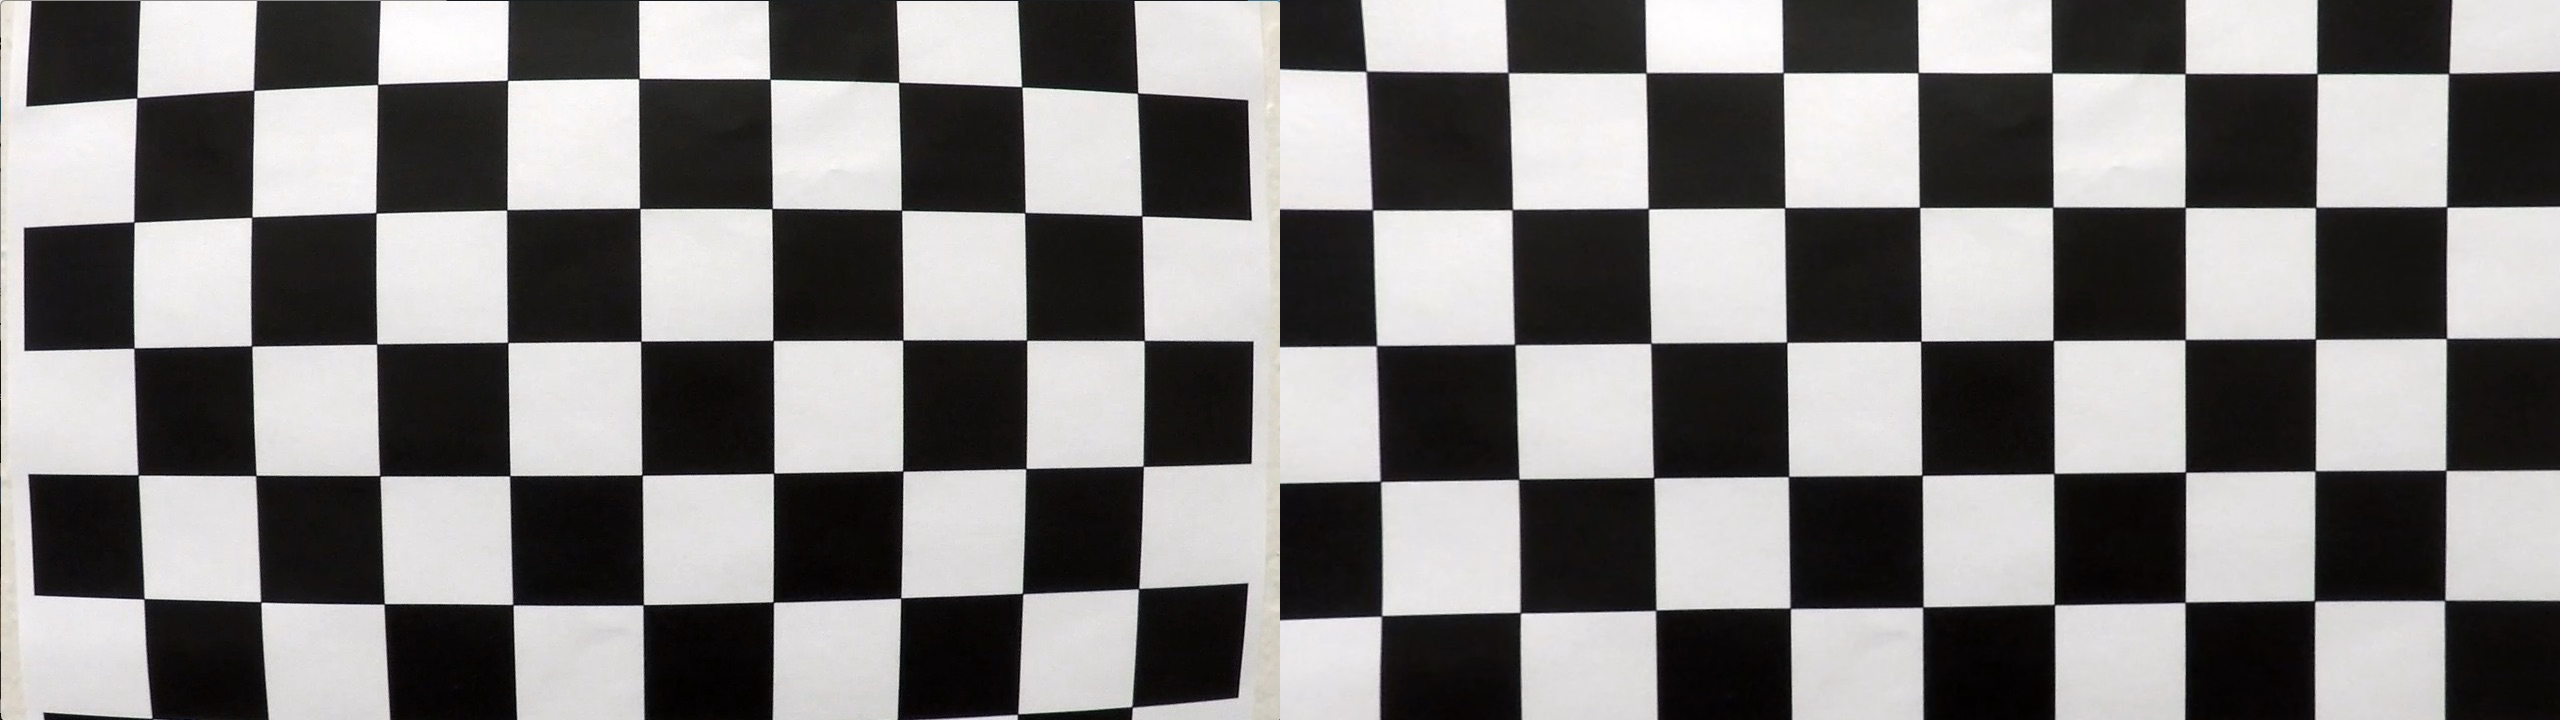

In [29]:
# example

# taking a image
img = cv2.imread('/content/Advanced-Lane-Lines/camera_cal/calibration1.jpg')
# undistorting image
output = undistort_img(img)
# gray 2D
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# display
display = np.hstack((img , output))
cv2_imshow(display)

------
# PerspectiveTransformation

In [30]:
# src = np.float32([(570, 460),    # top-left(550, 460)         # very close to the lane
#                   (250, 720),     # bottom-left(150, 720)
#                   (1000, 720),    # bottom-right(1200, 720)
#                   (700, 460)])    # top-right(770, 460)

src = np.float32([(550, 460),    # top-left(550, 460)
                  (150, 720),     # bottom-left(150, 720)
                  (1200, 720),    # bottom-right(1200, 720)
                  (770, 460)])    # top-right(770, 460)

dst = np.float32([(100, 0),
                  (100, 720),
                  (1100, 720),
                  (1100, 0)])
M = cv2.getPerspectiveTransform(src, dst)
M_inv = cv2.getPerspectiveTransform(dst, src)

def front_to_top_view(img, img_size=(1280, 720), flags=cv2.INTER_LINEAR):
  return cv2.warpPerspective(img, M, img_size, flags=flags)

def top_to_front_view(img, img_size=(1280, 720), flags=cv2.INTER_LINEAR):
  return cv2.warpPerspective(img, M_inv, img_size, flags=flags)

In [31]:
# example

img = mpimg.imread('/content/road.jpg')
p_img = img.copy()

p_img = front_to_top_view(p_img)
p_img = top_to_front_view(p_img)

cv2_imshow(p_img)

---------
# Thresholding

In [32]:
def threshold_image(img):

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.medianBlur(img, 7)
    # Normal
    ret, th_img = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)
    # OSTU
    # ret, th_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return th_img

In [33]:
# example

capture = cv2.VideoCapture('/content/Advanced-Lane-Lines/harder_challenge_video.mp4')
ret, frame = capture.read()
img = frame.copy()

frame = threshold_image(frame)
# frame = front_to_top_view(frame)
# frame = top_to_front_view(frame)

# cv2_imshow(img)
cv2_imshow(frame)

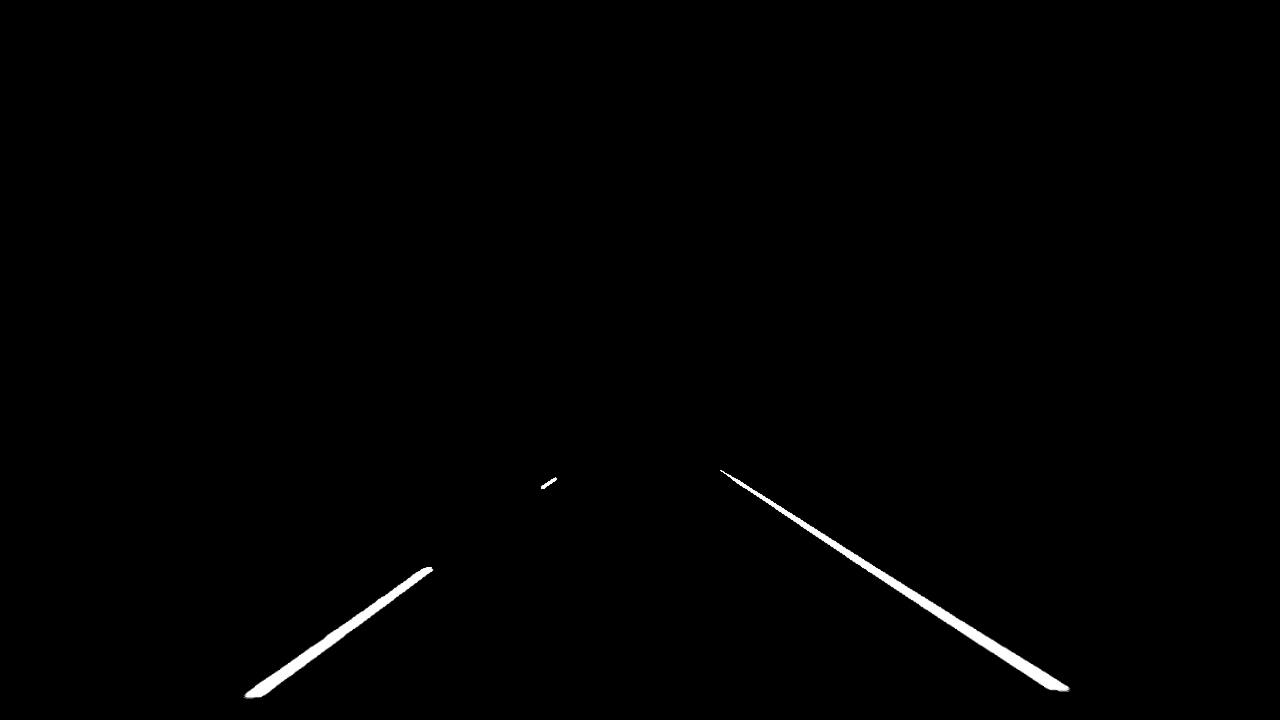

In [34]:
# total code

img = mpimg.imread('/content/road.jpg')

img = undistort_img(img)
# img = cv2.Canny(img, 50, 150)

img = threshold_image(img)
img = front_to_top_view(img)
img = top_to_front_view(img)

# ------------
# hougeLines = cv2.HoughLinesP(img, 2, np.pi/180, 180, np.array([]), minLineLength = 40 , maxLineGap = 5)
# # print(hougeLines)

# average_lines = average_slope_intersept(img , hougeLines)
# img = display_lines_average(img, average_lines)
# ------------

cv2_imshow(img)

Breif steps


*   A - Orginal Image
*   B - Gray Scale
*   C - Blur(Gaussian BLur)
*   D - Canny Edge
*   E - Masked Image (Region of Intrest)
*   F - Hough Lines (HoughLinesP)
*   G - Weighted Image

In [35]:
# Importing open cv
import cv2
from google.colab.patches import cv2_imshow

# Reading the video file
capture = cv2.VideoCapture('/content/test1.mp4')
# capture = cv2.VideoCapture('/content/Advanced-Lane-Lines/harder_challenge_video.mp4')
# capture = cv2.VideoCapture('/content/Advanced-Lane-Lines/challenge_video.mp4')

# ret is for degubbing
# frame is a image from the video mp4
ret, frame = capture.read()

# dispalying in the browser
cv2_imshow(frame)

# Canny edge detection
Step 1: Convert the image into gray scale image --
Step 2: Blur the image to reduce the lines of all other things like trees
Step 3:

In [36]:
def canny(img):
  gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

  # --------------
  # kernel =5
  # blur = cv2.GaussianBlur(gray , (kernel, kernel),0)
  # blur = cv2.GaussianBlur(gray , (5, 5),0)
  # --------------

  blur = cv2.GaussianBlur(gray , (5, 5),7)
  canny = cv2.Canny(blur , 50,150)
  return canny

In [37]:
def region_of_interest(img):
  height = img.shape[0]
  weight = img.shape[1]
  mask = np.zeros_like(img)
  # triangle = np.array([[(200,height),(800,350),(1200,height),]],np.int32)
  triangle = np.array([[(200,height),(800,350),(1200,height)]],np.int32)
  cv2.fillPoly(mask , triangle , 255)
  masked_image = cv2.bitwise_and(img, mask)
  return masked_image

# Change Points--------->
# change the region_of_interest from triangle to trapezium

In [38]:
def houge_lines(img):
  hougeLines = cv2.HoughLinesP(img, 2, np.pi/180, 180, np.array([]), minLineLength = 40 , maxLineGap = 5)
  return hougeLines


# Change Points--------->
# Know about these points
# Thetha = pi/180
# Rho = 1.89
# Threshold = 75
# min_line_length = 25
# max_line_gap = 125
# (values dependent on features)

In [39]:
def display_lines(img, lines):
  line_image = np.zeros_like(img)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2 = line.reshape(4)
      # cv2.line(line_image , (x1,y1), (x2,y2),(255,0,0),7)
      cv2.line(img , (x1,y1), (x2,y2),(255,0,0),10)
  # return line_image
  return img

In [40]:
def make_points(img, lineSI):
  slope, intersept = lineSI
  height = img.shape[0]
  y1 = int(height)
  y2 = int(y1*3.0/5)
  x1 = int((y1-intersept)/slope)
  x2 = int((y2-intersept)/slope)
  return [[x1,y1,x2,y2]]

In [41]:
def average_slope_intersept(img, lines):
  left_fit = []
  right_fit = []
  for line in lines:
    for x1, y1, x2, y2 in line:
      fit = np.polyfit((x1,x2), (y1,y2),1)
      slope = fit[0]
      intersept = fit[1]
      if slope < 0:
        left_fit.append((slope, intersept))
      else:
        right_fit.append((slope, intersept))

  left_fit_average= np.average(left_fit, axis=0)
  right_fit_average= np.average(right_fit, axis=0)

  left_line = make_points(img, left_fit_average)
  right_line = make_points(img, right_fit_average)

  average_lines = [left_line, right_line]

  return average_lines

In [42]:
# def display_lines_average(img, lines):
#   # line_image = np.zeros_like(img)
#   if lines is not None:
#     for line in lines:
#       for x1,y1,x2,y2 in line:
#       # cv2.line(line_image , (x1,y1), (x2,y2),(255,0,0),7)
#         cv2.line(img , (x1,y1), (x2,y2),(0,0,255),10)
#   # return line_image
#   return img

def display_lines_average(img, lines):
  # Create a copy of the image to avoid modifying the original
  line_image = img.copy()
  if lines is not None:
    for line in lines:
      for x1,y1,x2,y2 in line:
        cv2.line(line_image , (x1,y1), (x2,y2),(0,0,255),10)
  return line_image # Return the modified copy

------
`Main code`

[[[326, 720, 710, 432]], [[1058, 720, 781, 432]]]


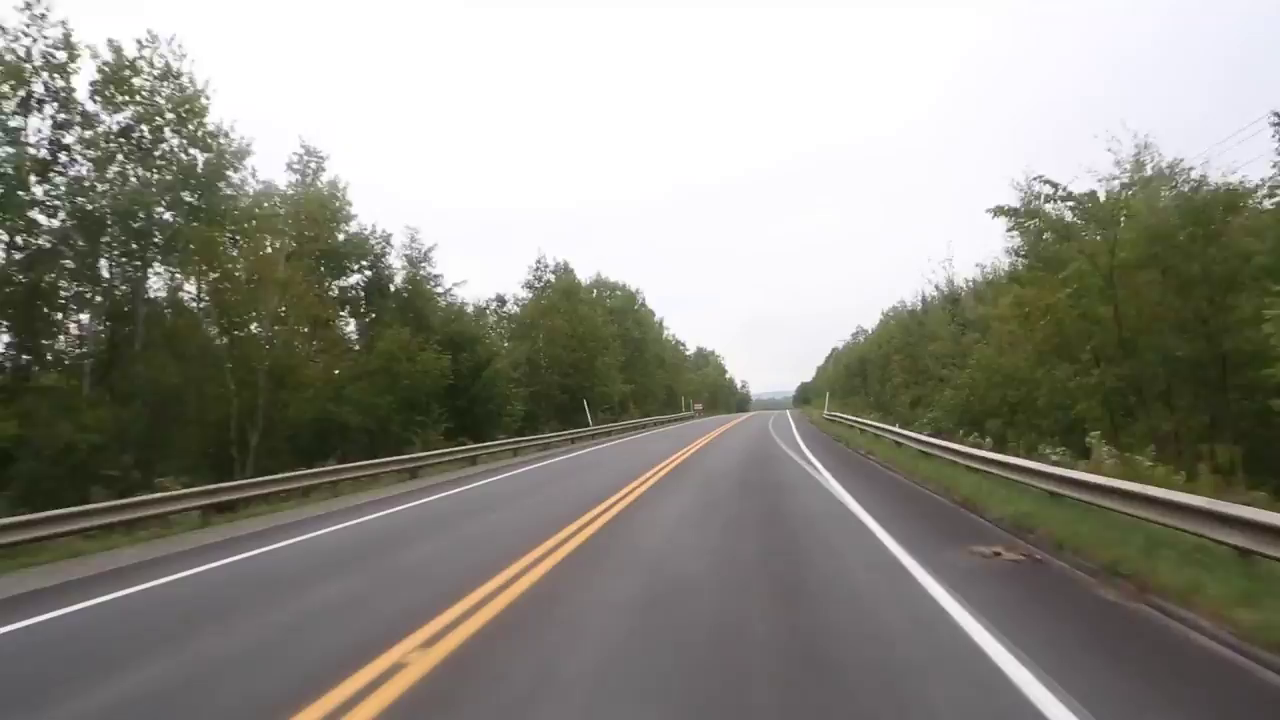

In [43]:
canny_output = canny(frame)
masked_output = region_of_interest(canny_output)
lines = houge_lines(masked_output)
# print(lines)
# x = display_lines(masked_output, lines)
average_lines = average_slope_intersept(frame , lines)
print(average_lines)
# line_image = display_lines(frame, average_lines)
line_image = display_lines_average(frame, average_lines)

cv2_imshow(frame)

In [44]:
def process_image(image):

        # undis_img = undistort_img(image)
        # canny_output = canny(undis_img)

        canny_output = canny(image)
        masked_output = region_of_interest(canny_output)
        lines = houge_lines(masked_output)
        average_lines = average_slope_intersept(image , lines)
        out_img = display_lines_average(image, average_lines)

        return out_img

# Main
output = 'output_video.mp4'
clip1 = VideoFileClip("/content/test1.mp4")
white_clip = clip1.fl_image(process_image)
%time white_clip.write_videofile(output, audio=False)

Moviepy - Building video output_video.mp4.
Moviepy - Writing video output_video.mp4



t: 100%|█████████▉| 781/782 [01:09<00:00, 11.26it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/test1.mp4, 2764800 bytes wanted but 0 bytes read,at frame 781/782, at time 26.06/26.08 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready output_video.mp4
CPU times: user 14.9 s, sys: 2.21 s, total: 17.2 s
Wall time: 1min 12s


# Camera Calibration

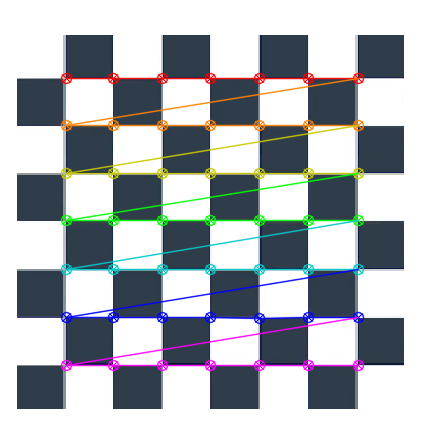

In [45]:
import cv2
from google.colab.patches import cv2_imshow

nx = 7
ny = 7
img = cv2.imread('/content/chess.png')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray , (nx,ny),False)

if ret == True:
  cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
  cv2_imshow(img)

In [46]:
import cv2
import numpy as np

src = np.float32([
                (550,460),
                (150,720),
                (1200,720),
                (770,460),
])

dst = np.float32([
                (100,0),
                (100,720),
                (1100,720),
                (1100,0)
])
W = cv2.getPerspectiveTransform(src,dst)
W_inv = cv2.getPerspectiveTransform(dst,src)

def front_to_top(img):
  size = (1280,720)
  return cv2.warpPerspective(img,  W,size , flags =cv2.INTER_LINEAR)

# cv.warpPerspective(	src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]	) ->	dst


def top_to_front(img):
  size = (1280,720)
  return cv2.warpPerspective(img,  W_inv,size , flags =cv2.INTER_LINEAR)

image = cv2.imread('/content/road.jpg')
output_top = front_to_top(image)
output_front = top_to_front(output_top)

from google.colab.patches import cv2_imshow
# cv2_imshow(image)
# cv2_imshow(output_top)

display = np.hstack((image ,output_top ,output_front ))
cv2_imshow(display)